[1] 7197   17

X,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shopping",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1


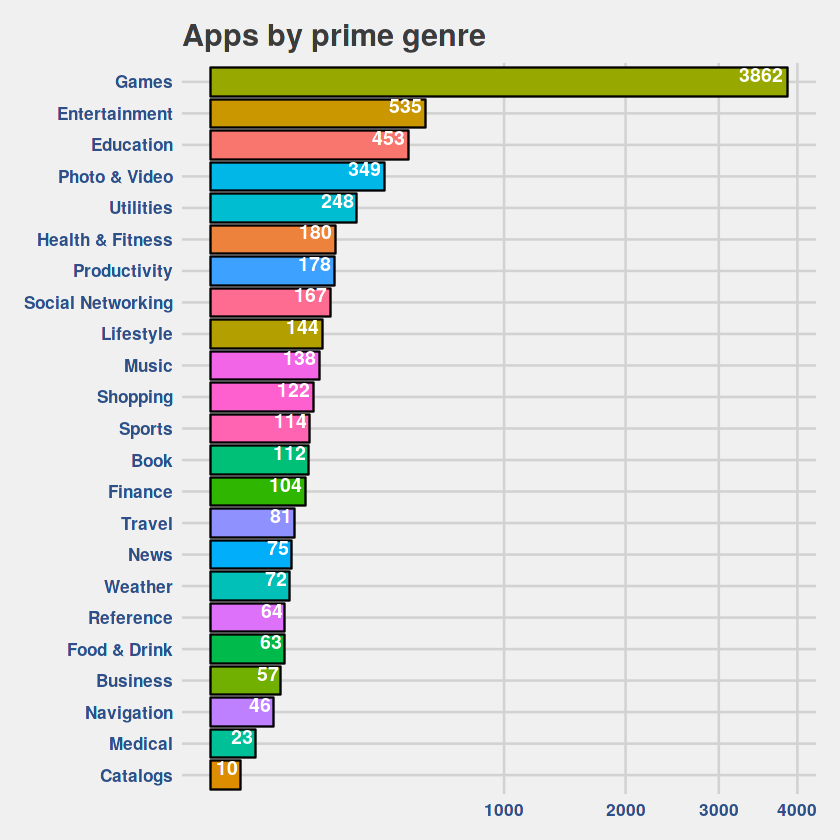

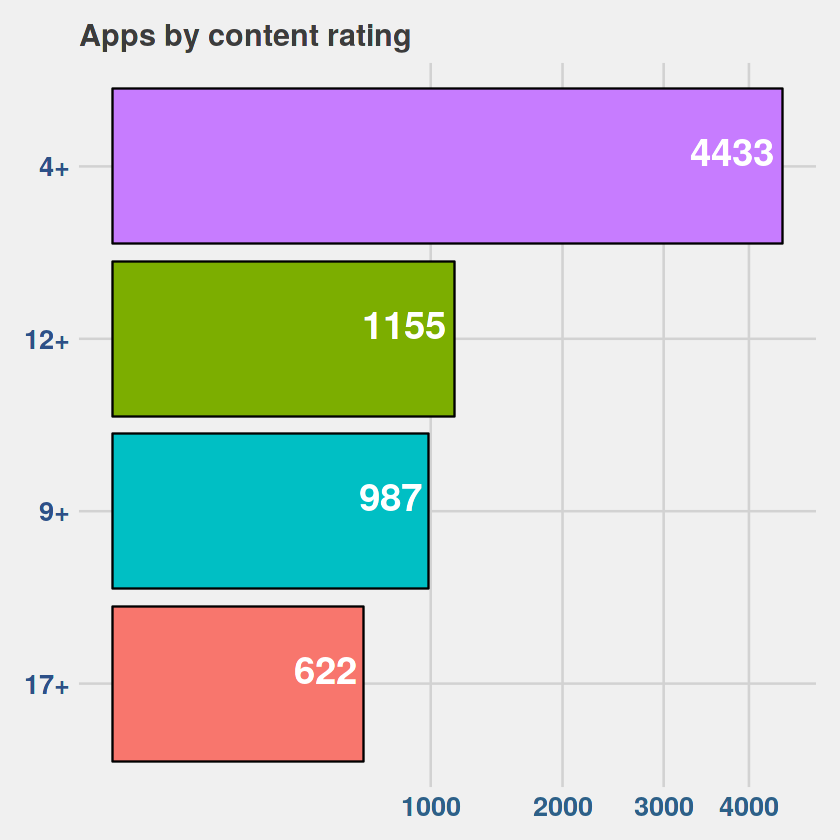

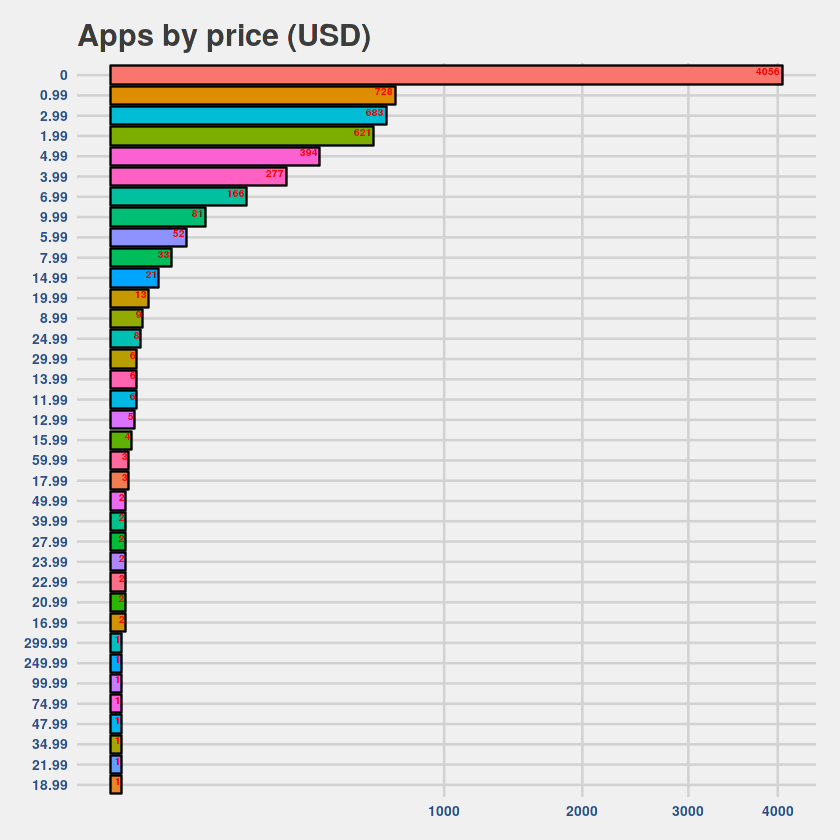

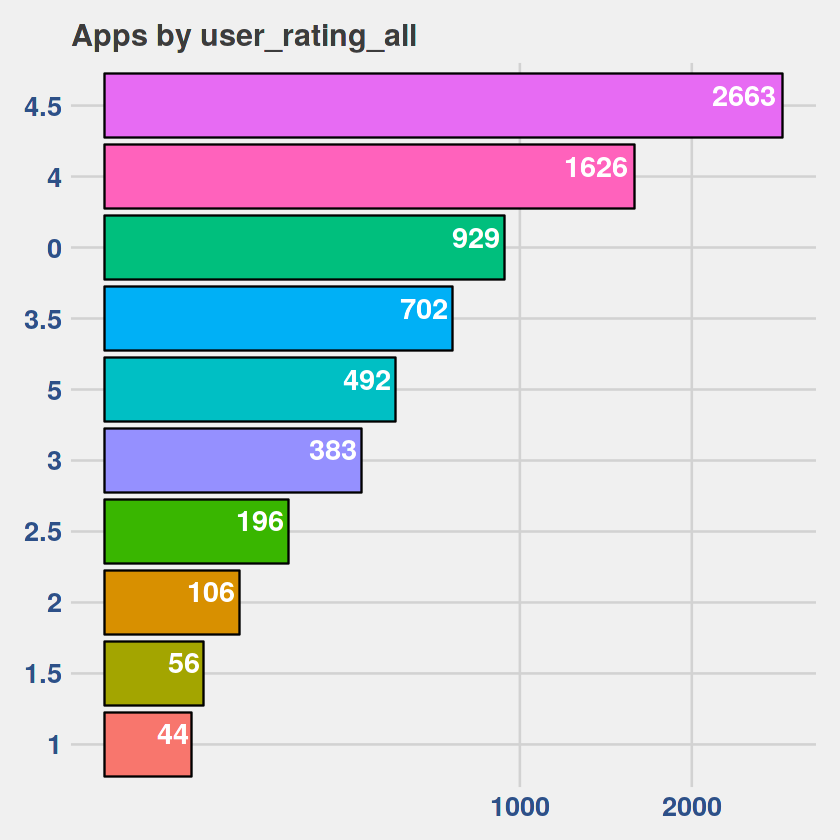

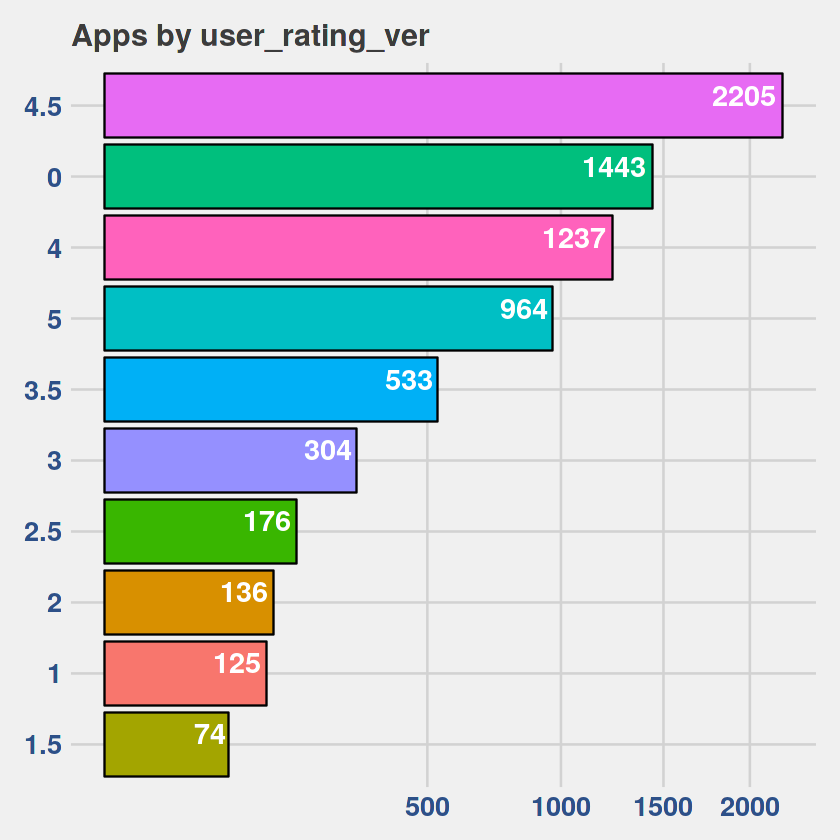

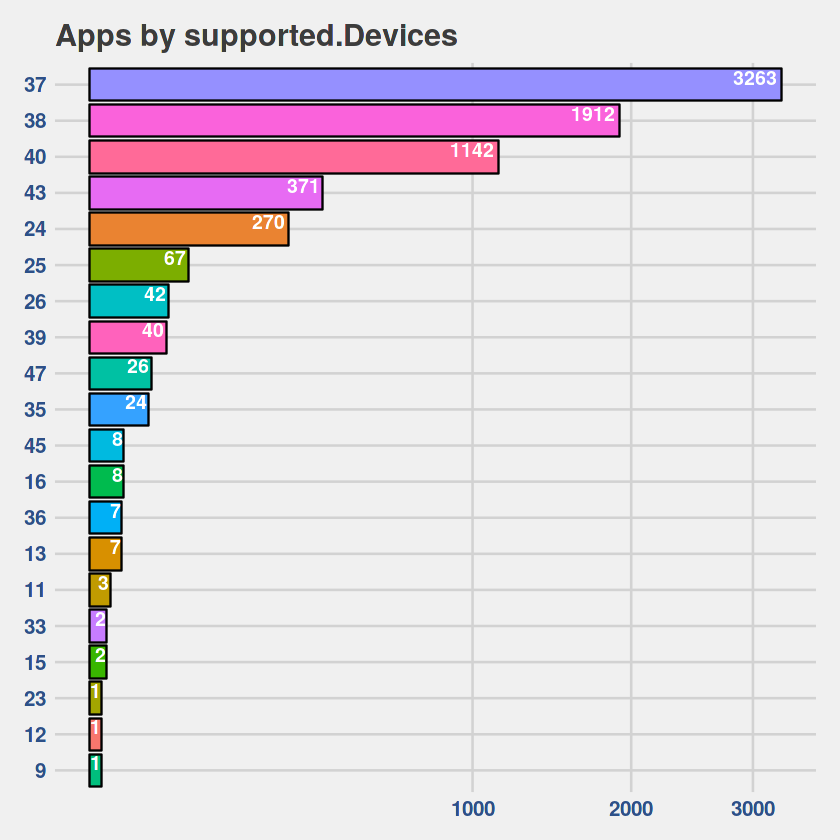

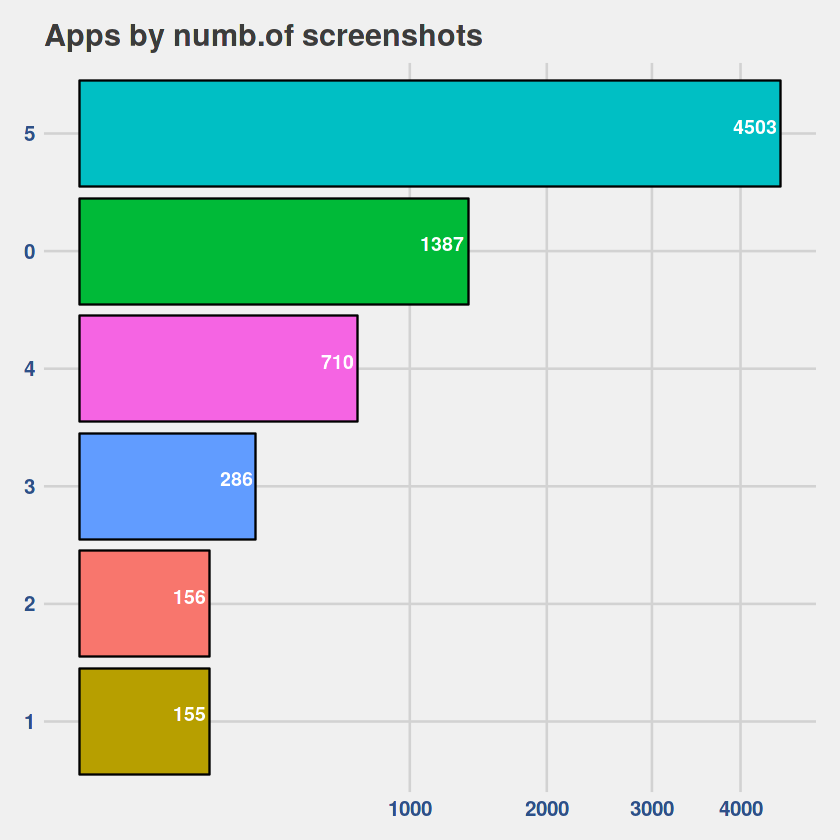

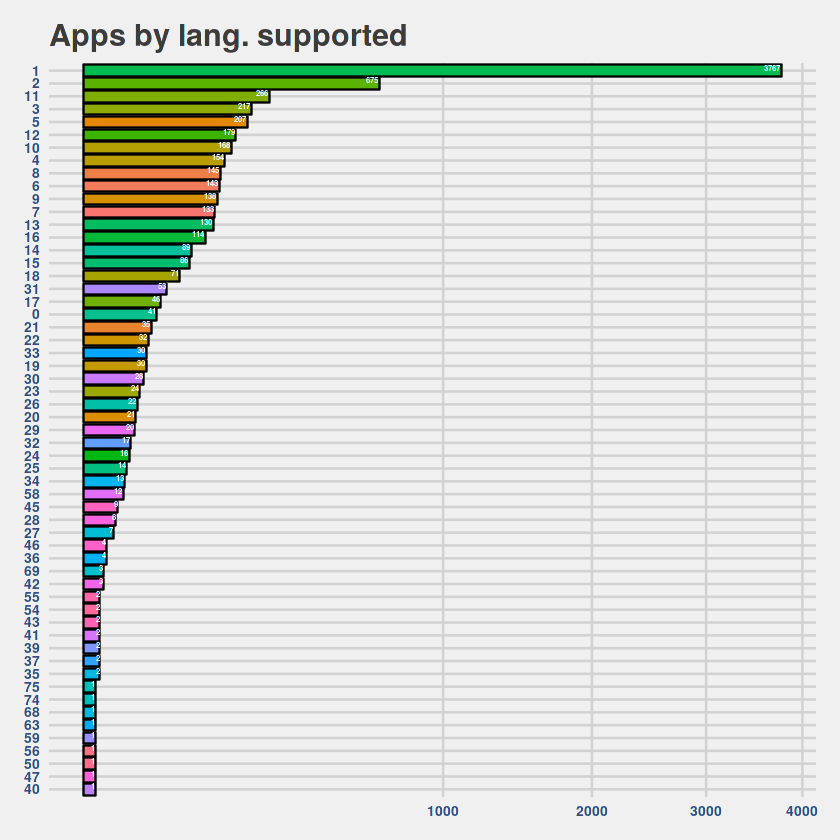

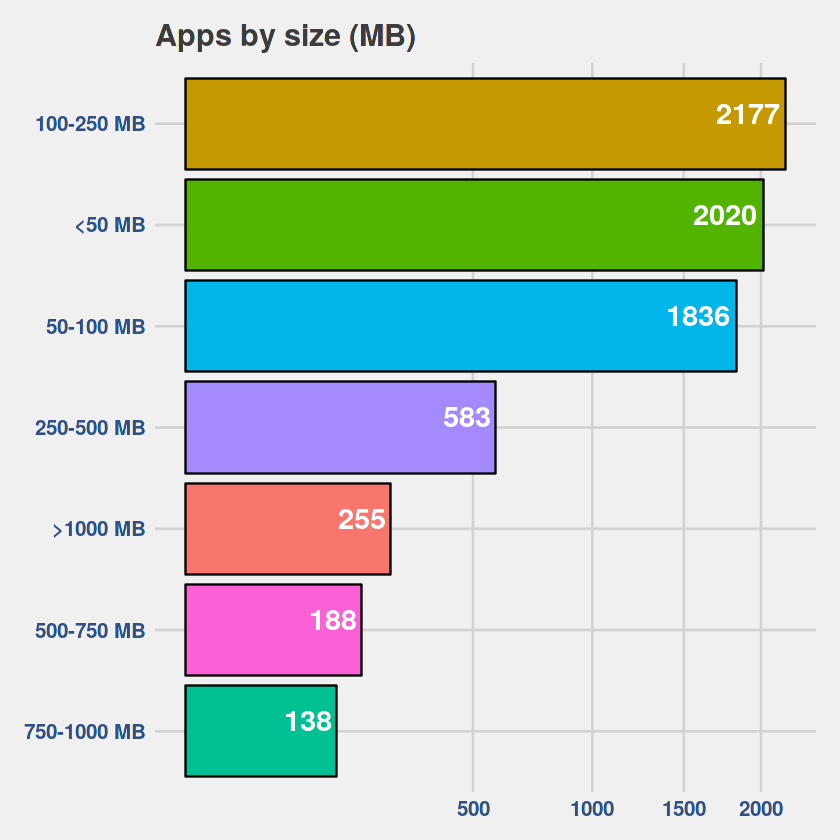

In [1]:
#This R environment comes with all of CRAN preinstalled, as well as many other helpful packages

options(warn=0)

 suppressMessages(library(dplyr))
 suppressMessages(library(ggplot2))
 suppressMessages(library(ggthemes))
 suppressMessages(library(RColorBrewer))
 suppressMessages(library(gdata))

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# load nonzero app file
df <- read.csv("../input/AppleStore.csv")

##
dim(df)

## 
head(df)
##

## ++++++++++++++++++++++++++++++++++++++++++++++++++++
## Apps by Genre

df.genre <- df %>%
            group_by(prime_genre) %>%
            summarize(tot.apps=n())


mydf <- transform(df.genre, prime_genre = reorder(prime_genre, tot.apps)) 

colourCount = length(unique(mydf$tot.apps))
getPalette = colorRampPalette(brewer.pal(9, "Paired"))


#++++++++++++++++ ggplot
p1 <- ggplot(mydf, aes(x=prime_genre, y=tot.apps,
                fill=getPalette(colourCount),
               label=tot.apps)) +
    geom_bar(stat='identity', position='dodge', color="black")+
    scale_y_sqrt()+
    coord_flip()+
    geom_text(hjust =1.1, vjust=0,color="white", fontface = "bold",size=4)+
    theme_bw()+
     theme_fivethirtyeight()+
     theme(legend.position="none")+
     ggtitle("Apps by prime genre")

p2 <- p1+ 
        theme(axis.text.x = element_text(face="bold", color="#2D5088", 
                           size=10, angle=0),
          axis.text.y = element_text(face="bold", color="#2D5088", 
                           size=10, angle=0))     

p2

## Apps by content Rating
df.cont <- df %>%
            group_by(cont_rating) %>%
            summarize(tot.apps=n())
            

mydf <- transform(df.cont, cont_rating = reorder(cont_rating, tot.apps)) 

colourCount = length(unique(mydf$tot.apps))
getPalette = colorRampPalette(brewer.pal(9, "Paired"))


#++++++++++++++++ ggplot
p3 <- ggplot(mydf, aes(x=cont_rating, y=tot.apps,
                fill=getPalette(colourCount),
               label=tot.apps)) +
    geom_bar(stat='identity', position='dodge', color="black")+
    scale_y_sqrt()+
    coord_flip()+
    geom_text(hjust =1.1, vjust=0,color="white", fontface = "bold",size=8)+
    theme_bw()+
     theme_fivethirtyeight()+
     theme(legend.position="none")+
     ggtitle("Apps by content rating")

     
p4 <- p3+ 
        theme(axis.text.x = element_text(face="bold", color="#2D6088", 
                           size=16, angle=0),
          axis.text.y = element_text(face="bold", color="#2D5088", 
                           size=16, angle=0))     
p4



##++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Apps by price

df.price <- df %>%
            group_by(price) %>%
            summarize(tot.apps=n())
            

mydf <- transform(df.price, price = reorder(price, tot.apps)) 

colourCount = length(unique(mydf$price))
getPalette = colorRampPalette(brewer.pal(9, "Set3"))


#++++++++++++++++ ggplot
p5 <- ggplot(mydf, aes(x=price, y=tot.apps,
                fill=getPalette(colourCount),
               #fill="darkgreen",
               label=tot.apps)) +
    geom_bar(stat='identity', position='dodge', 
             #fill="#3b5998",
             color="black")+
    scale_y_sqrt()+
    coord_flip()+
    geom_text(hjust =1.1, vjust=0,color="red", fontface = "bold",size=2)+
    theme_bw()+
     theme_fivethirtyeight()+
     theme(legend.position="none")+
     ggtitle("Apps by price (USD)")

     
p6 <- p5+ 
        theme(axis.text.x = element_text(face="bold", color="#2D5088", 
                           size=8, angle=0),
          axis.text.y = element_text(face="bold", color="#2D5088", 
                           size=8, angle=0))     

p6
##########


##++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Apps by user rating

df.cont <- df %>%
            group_by(user_rating) %>%
            summarize(tot.apps=n())
            

mydf <- transform(df.cont, user_rating = reorder(user_rating, tot.apps)) 

colourCount = length(unique(mydf$tot.apps))
getPalette = colorRampPalette(brewer.pal(9, "Paired"))


#++++++++++++++++ ggplot
p7 <- ggplot(mydf, aes(x=user_rating, y=tot.apps,
                fill=getPalette(colourCount),
               label=tot.apps)) +
    geom_bar(stat='identity', position='dodge', color="black")+
    scale_y_sqrt()+
    coord_flip()+
    geom_text(hjust =1.1, vjust=0,color="white", fontface = "bold",size=6)+
    theme_bw()+
     theme_fivethirtyeight()+
     theme(legend.position="none")+
     ggtitle("Apps by user_rating_all")

     
p8 <- p7+ 
        theme(axis.text.x = element_text(face="bold", color="#2D5088", 
                           size=16, angle=0),
          axis.text.y = element_text(face="bold", color="#2D5088", 
                           size=16, angle=0))     

p8



##### 
## Latest version : User ratings


df.cont <- df %>%
            group_by(user_rating_ver) %>%
            summarize(tot.apps=n())
            

mydf <- transform(df.cont, user_rating_ver = reorder(user_rating_ver, tot.apps)) 

colourCount = length(unique(mydf$tot.apps))
getPalette = colorRampPalette(brewer.pal(9, "Paired"))


#++++++++++++++++ ggplot
p9 <- ggplot(mydf, aes(x=user_rating_ver, y=tot.apps,
                fill=getPalette(colourCount),
               label=tot.apps)) +
    geom_bar(stat='identity', position='dodge', color="black")+
    scale_y_sqrt()+
    coord_flip()+
    geom_text(hjust =1.1, vjust=0,color="white", fontface = "bold",size=6)+
    theme_bw()+
     theme_fivethirtyeight()+
     theme(legend.position="none")+
     ggtitle("Apps by user_rating_ver")

     
p10 <- p9+ 
        theme(axis.text.x = element_text(face="bold", color="#2D5088", 
                           size=16, angle=0),
          axis.text.y = element_text(face="bold", color="#2D5088", 
                           size=16, angle=0))     

p10



##++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Apps by sup_devices.num

df.cont <- df %>%
            group_by(sup_devices.num) %>%
            summarize(tot.apps=n())
            

mydf <- transform(df.cont, sup_devices.num = reorder(sup_devices.num, tot.apps)) 

colourCount = length(unique(mydf$sup_devices.num))
getPalette = colorRampPalette(brewer.pal(9, "Paired"))

#++++++++++++++++ ggplot
p11 <- ggplot(mydf, aes(x=sup_devices.num, y=tot.apps,
               fill=getPalette(colourCount),
               #fill=sup_devices.num,
               group = tot.apps,
               label=tot.apps)) +
    geom_bar(stat='identity', position='dodge', color="black")+
    scale_y_sqrt()+
    coord_flip()+
    geom_text(hjust =1.1, vjust=0,color="white", fontface = "bold",size=4)+
    theme_bw()+
     theme_fivethirtyeight()+
     theme(legend.position="none")+
     ggtitle("Apps by supported.Devices")

     
p12 <- p11+ 
        theme(axis.text.x = element_text(face="bold", color="#2D5088", 
                           size=12, angle=0),
          axis.text.y = element_text(face="bold", color="#2D5088", 
                           size=12, angle=0))    

p12


##++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Apps by number of screenshots

df.cont <- df %>%
            group_by(ipadSc_urls.num) %>%
            summarize(tot.apps=n())
            

mydf <- transform(df.cont, ipadSc_urls.num = reorder(ipadSc_urls.num, tot.apps)) 

colourCount = length(unique(mydf$ipadSc_urls.num))
getPalette = colorRampPalette(brewer.pal(9, "Paired"))

#++++++++++++++++ ggplot
p13 <- ggplot(mydf, aes(x=ipadSc_urls.num, y=tot.apps,
               fill=getPalette(colourCount),
               #fill=sup_devices.num,
               group = tot.apps,
               label=tot.apps)) +
    geom_bar(stat='identity', position='dodge', color="black")+
    scale_y_sqrt()+
    coord_flip()+
    geom_text(hjust =1.1, vjust=0,color="white", fontface = "bold",size=4)+
    theme_bw()+
     theme_fivethirtyeight()+
     theme(legend.position="none")+
     ggtitle("Apps by numb.of screenshots")

     
p14 <- p13+ 
        theme(axis.text.x = element_text(face="bold", color="#2D5088", 
                           size=12, angle=0),
                        axis.text.y = element_text(face="bold", color="#2D5088", 
                           size=12, angle=0))     

p14


#+++++++++++++++++++++++++++++++++++++
## Apps by language supported 

df.cont <- df %>%
            group_by(lang.num) %>%
            summarize(tot.apps=n())
            
 
#df.cont <- mutate(df.cont, vpp_lic = ifelse(vpp_lic > 0, "Yes", "No"))           

mydf <- transform(df.cont, lang.num = reorder(lang.num, tot.apps)) 

colourCount = length(unique(mydf$lang.num))
getPalette = colorRampPalette(brewer.pal(9, "Paired"))

#++++++++++++++++ ggplot
p15 <- ggplot(mydf, aes(x=lang.num, y=tot.apps,
               fill=getPalette(colourCount),
               #fill=sup_devices.num,
               group = tot.apps,
               label=tot.apps)) +
    geom_bar(stat='identity', position='dodge', color="black")+
    scale_y_sqrt()+
    coord_flip()+
    geom_text(hjust =1.1, vjust=0,color="white", fontface = "bold",size=1.5)+
    theme_bw()+
     theme_fivethirtyeight()+
     theme(legend.position="none")+
     ggtitle("Apps by lang. supported")

     
p16 <- p15+ 
        theme(axis.text.x = element_text(face="bold", color="#2D5088", 
                           size=8, angle=0),
          axis.text.y = element_text(face="bold", color="#2D5088", 
                           size=8, angle=0))    

p16


##++++++++++++++++
## Apps by size (MB)


options(scipen=999)
app.dff <- mutate(df,size_mb=humanReadable(size_bytes,standard="IEC", units="MiB"))
app.dff$size_mb <- gsub("MiB","",app.dff$size_mb)
app.dff$size_mb <- as.numeric(as.character(app.dff$size_mb))

app_dff <- mutate(app.dff, size_range = ifelse(size_mb < 50, "<50 MB",
                                     ifelse(((size_mb > 50) & (size_mb < 100)), "50-100 MB",
                                            ifelse(((size_mb > 100) & (size_mb < 250)), "100-250 MB",
                                              ifelse(((size_mb > 250) & (size_mb < 500)), "250-500 MB",
                                                 ifelse(((size_mb > 500) & (size_mb < 750)), "500-750 MB",
                                                   ifelse(((size_mb > 750) & (size_mb < 1000)), "750-1000 MB", ">1000 MB")))))))
                                                   
  
#++++++++++

df.cont <- app_dff %>%
            group_by(size_range) %>%
            summarize(tot.apps=n())
            
 
#df.cont <- mutate(df.cont, vpp_lic = ifelse(vpp_lic > 0, "Yes", "No"))           

mydf <- transform(df.cont, size_range = reorder(size_range, tot.apps)) 

colourCount = length(unique(mydf$size_range))
getPalette = colorRampPalette(brewer.pal(9, "Paired"))

#++++++++++++++++ ggplot
p17 <- ggplot(mydf, aes(x=size_range, y=tot.apps,
               fill=getPalette(colourCount),
               #fill=sup_devices.num,
               group = tot.apps,
               label=tot.apps)) +
    geom_bar(stat='identity', position='dodge', color="black")+
    scale_y_sqrt()+
    coord_flip()+
    geom_text(hjust =1.1, vjust=0,color="white", fontface = "bold",size=6)+
    theme_bw()+
     theme_fivethirtyeight()+
     theme(legend.position="none")+
     ggtitle("Apps by size (MB)")

     
p18 <- p17+ 
        theme(axis.text.x = element_text(face="bold", color="#2D5088", 
                           size=12, angle=0),
          axis.text.y = element_text(face="bold", color="#2D5088", 
                           size=12, angle=0))     


p18